In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


unused

In [ ]:
First_CSV = pd.read_csv('/content/drive/MyDrive/Colab Files/Hate CSV/bengali_ hate_v1.0.csv')
df1=First_CSV
First_CSV_array=np.array(First_CSV)
First_CSV_array

array([['ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পারিকর  এই কদিন আগেই যিনি ঘোষনা দেন বাংলাদেশ দখল করে মহাভারত গঠন করবেন আশ্চর্য তিনিই কিনা আমাদের বরেন্য রাষ্ট্রীয় অতিথি\tGeopolitical'],
       [' রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে  \tGeopolitical'],
       ['এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে বাহির দেশে বাংলাদেশীদের দেখতে পারেনা এই একটি মাএ জাতি সুতরাং সাবধান \tReligious'],
       ...,
       ['হাচিনার মারে আমি চুদি \tGender abusive'],
       ['লাভ নাই আম্লীগ আর যে কদিন ভারতও সে কদিন এমনিতেই আম্লিগ গাট্টী গোট্টা বাইন্ধা রেডি আছে \tGeopolitical'],
       ['পাকিস্তান বাংলাদেশ এক থাকলে মায়ানমার বিশাল বড় বাশ খেতো\tGeopolitical']],
      dtype=object)

In [ ]:
df1.count()

text\tlabel    3418
dtype: int64

In [ ]:
Second_CSV = pd.read_csv('/content/drive/MyDrive/Colab Files/Hate CSV/bengali_hate_v2.0.csv')
df=Second_CSV
Second_CSV_array=np.array(Second_CSV)
Second_CSV_array

array([['বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না - পোলাপান এর চোখ কিভাবে ঠিক থাকবে!',
        'Personal', 0],
       ['এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে বছরের পর বছর, তাদের আরো এমন রাস্তায় রাস্তায় কাঁদতে হবে ',
        'Political', 1],
       ['পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস্থা ধ্বংসের জন্য ভারতের প্রত্যক্ষ সহযোগিতায় এই হত্যাকা- ঘটানো হয়েছিল ',
        'Geopolitical', 3],
       ...,
       ['হিন্দুদের মধ্যে এগুলো হয় এটাই তার বাস্তব প্রমাণ সবাই মতামত দিন ',
        'Personal', 0],
       ['দেখলে মনে হয় শালী একটা অস্ট্রেলিয়ান গাভী ', 'Personal', 0],
       ['ভাই আমি আপনার সাথে একমত। আর নারী নেতৃত্বে থাকতে চাই না। ভিপি নুর অথবা এর মত সৎ ও সাহসী কোন একজন নেতা আমাদের চাই।',
        'Political', 1]], dtype=object)

In [ ]:
dataset

,text,category,label,cleaned,length,LineLength
0,বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না - পোল...,Personal,0,বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না পোল...,16,16
1,এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে ...,Political,1,এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে ...,18,18
2,পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস...,Geopolitical,3,পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস...,14,14
3,ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না। ভা...,Geopolitical,3,ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না ভা...,20,20
4,খানকির পুলা মালায়নদের মেরে সাফা করে ফেল,Personal,0,খানকির পুলা মালায়নদের মেরে সাফা করে ফেল,7,7
...,...,...,...,...,...,...
5693,জুতা যতই দামি হোক তার স্থান পায়ে তার স্থান কখ...,Personal,0,জুতা যতই দামি হোক তার স্থান পায়ে তার স্থান কখ...,22,22
5694,"আমাদের দেশ ছোট বলে ভারতের চেয়ে পিছিয়ে, না হয়...",Geopolitical,3,আমাদের দেশ ছোট বলে ভারতের চেয়ে পিছিয়ে না হয়...,16,16
5695,হিন্দুদের মধ্যে এগুলো হয় এটাই তার বাস্তব প্রমা...,Personal,0,হিন্দুদের মধ্যে এগুলো হয় এটাই তার বাস্তব প্রমা...,11,11
5696,দেখলে মনে হয় শালী একটা অস্ট্রেলিয়ান গাভী,Personal,0,দেখলে মনে হয় শালী একটা অস্ট্রেলিয়ান গাভী,7,7


In [ ]:
Second_CSV.count()

text      5698
label     5698
target    5698
dtype: int64

In [ ]:
df.head(5)

,text,label,target
0,বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না - পোল...,Personal,0
1,এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে ...,Political,1
2,পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস...,Geopolitical,3
3,ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না। ভা...,Geopolitical,3
4,খানকির পুলা মালায়নদের মেরে সাফা করে ফেল,Personal,0


In [ ]:
df.rename(columns={'label' : 'category'}, inplace=True)
df.rename(columns={'target' : 'label'}, inplace=True)
df.head(5)

,text,category,label
0,বৌদির দুধ দেকে তো আমার ই চোখ ঠিক ছিলো না - পোল...,Personal,0
1,এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে ...,Political,1
2,পিলখানা হত্যাকান্ড বাংলাদেশের প্রতিরক্ষা ব্যবস...,Geopolitical,3
3,ভারতের অর্থনীতি নিয়ে আপনাদের ভাবতে হবে না। ভা...,Geopolitical,3
4,খানকির পুলা মালায়নদের মেরে সাফা করে ফেল,Personal,0


In [ ]:
df.groupby('label').count()

,text,category
label,,
0,2189,2189
1,814,814
2,957,957
3,1738,1738


In [ ]:
df.groupby('category').count()

,text,label
category,,
Geopolitical,1738,1738
Personal,2189,2189
Political,814,814
Religious,957,957


In [ ]:
Personal,  Political, Religious, Geopolitical  = np.bincount(df['label'])
total = Geopolitical + Personal + Political + Religious
print('Examples:\n    Total: {}\n    Geopolitical: {} ({:.2f}% of total)\n'.format(
    total, Geopolitical, 100 * Geopolitical / total))
print('Examples:\n    Total: {}\n    Personal: {} ({:.2f}% of total)\n'.format(
    total, Personal, 100 * Personal / total))
print('Examples:\n    Total: {}\n    Political: {} ({:.2f}% of total)\n'.format(
    total, Political, 100 * Political / total))
print('Examples:\n    Total: {}\n    Religious: {} ({:.2f}% of total)\n'.format(
    total, Religious, 100 * Religious / total))

Examples:
    Total: 5698
    Geopolitical: 1738 (30.50% of total)

Examples:
    Total: 5698
    Personal: 2189 (38.42% of total)

Examples:
    Total: 5698
    Political: 814 (14.29% of total)

Examples:
    Total: 5698
    Religious: 957 (16.80% of total)



In [ ]:
import os

#import tensorflow as tf
#import tensorflow_hub as hub

import gdown
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install wordcloud bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


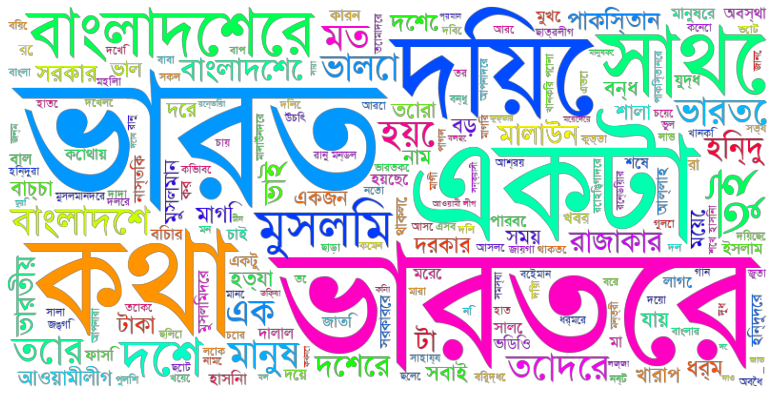

In [ ]:
from wordcloud import WordCloud
from bnlp.corpus import stopwords, punctuations

# def get_mask(img_path):
#     img = cv2.imread(img_path, -1)
#     if img.shape[2] == 3:
#       return img
 
#     return cv2.bitwise_not(img[:, :, 3])

def clean(text):
    text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\xa0', '', text)
    
    return text

cleaned_text = df['text'].apply(lambda x: clean(str(x)))
cleaned_text
refined_sentence = " ".join(cleaned_text)

#mask = get_mask("pikachu.png")
regex = r"[\u0980-\u09FF]+"

wc = WordCloud(width=800,
               height=400,
               mode="RGBA",
               background_color=None,
               colormap="hsv",
               #mask=mask,
               stopwords = stopwords,
               font_path="/content/drive/MyDrive/Colab Files/Hate CSV/SutonnyOMJunicode.ttf",
               regexp=regex
               ).generate(refined_sentence)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

result = wc.to_file("Bengali_word_cloud.png")

In [ ]:
def cleaning_data(row):
      headlines = re.sub('[^\u0980-\u09FF]',' ',str(row)) #removing unnecessary punctuation
      return headlines
# Apply the function into the dataframe
df['cleaned'] = df['text'].apply(cleaning_data)  

# print some cleaned reviews from the dataset
#sample_data = [2000,5000,10000,20000,30000,35000,40000,45000,50000,60000,65000,70000,75000,80000,100000]
sample_data = [20,50,100,200,300,350,400,450,500,600,650,700,750,800,1000]
for i in sample_data:
  print('Original: ',df.text[i],'\nCleaned:',
           df.cleaned[i],'\n','Category:-- ',df.category[i],'\n')   

Original:  আমি চাই এ যুদদে ভারত জয়ী হউক 
Cleaned: আমি চাই এ যুদদে ভারত জয়ী হউক 
 Category:--  Geopolitical 

Original:  প্লিজ সকল মুসলিম ভাইদের বলছি এই সমস্ত মালাউন শয়তান থেকে সাবধান 
Cleaned: প্লিজ সকল মুসলিম ভাইদের বলছি এই সমস্ত মালাউন শয়তান থেকে সাবধান 
 Category:--  Religious 

Original:  হাজার হাজার মুসলিম মরছে সেই দিকে নজর নাই ভারতের জন্য ব্যথা প্রকাশ বাংলাদেশে রোহিঙ্গাদের পূর্নবাসনের ব্যবস্তা করা হোক অামরা মানবতার পাশে দাড়াতে চাই । 
Cleaned: হাজার হাজার মুসলিম মরছে সেই দিকে নজর নাই ভারতের জন্য ব্যথা প্রকাশ বাংলাদেশে রোহিঙ্গাদের পূর্নবাসনের ব্যবস্তা করা হোক অামরা মানবতার পাশে দাড়াতে চাই   
 Category:--  Geopolitical 

Original:   বাংলাদেশ করতে না পারলে রেন্ডিয়াও রান করতে পারতো না।  
Cleaned:  বাংলাদেশ করতে না পারলে রেন্ডিয়াও রান করতে পারতো না   
 Category:--  Geopolitical 

Original:  রানু একটা খানকি ওকে কুকুরে লাগাতো  
Cleaned: রানু একটা খানকি ওকে কুকুরে লাগাতো  
 Category:--  Personal 

Original:  এই দিবকর দেবনাথ এর মতন মুর্খ দেখি নাই ধর্মগ্রন্থ মানবেনা নিজের লজিক ই সব  
Cleane

In [ ]:
# Length of each headlines
df['length'] = df['cleaned'].apply(lambda x:len(x.split()))
# Remove the headlines with least words
dataset = df.loc[df.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Headlines".format(len(df)-len(dataset)),
      "\nTotal Headlines:",len(dataset))

After Cleaning: 
Removed 0 Small Headlines 
Total Headlines: 5698


In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the headlines and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label


documents,words,u_words,class_names = data_summary(dataset) 


Class Name :  Personal
Number of Documents:2189
Number of Words:27883
Number of Unique Words:7696
Most Frequent Words:

না	482
করে	296
এই	293
আর	272
কি	269
কে	182
হয়	181
তো	174
আমি	150
তোর	149

Class Name :  Geopolitical
Number of Documents:1738
Number of Words:34652
Number of Unique Words:9162
Most Frequent Words:

ভারত	532
না	509
ভারতের	463
করে	382
আর	363
কি	230
এই	198
আমাদের	190
ভারতে	188
বাংলাদেশ	174

Class Name :  Religious
Number of Documents:957
Number of Words:15260
Number of Unique Words:5013
Most Frequent Words:

না	235
করে	192
মালাউন	158
আর	156
ধর্ম	117
এই	110
কি	109
হিন্দু	97
মুসলিম	86
মালাউনের	83

Class Name :  Political
Number of Documents:814
Number of Words:13129
Number of Unique Words:4318
Most Frequent Words:

না	206
করে	148
রাজাকার	139
আর	137
এই	96
লীগ	93
ও	93
হবে	82
কি	82
কে	79
Total Number of Unique Words:17649


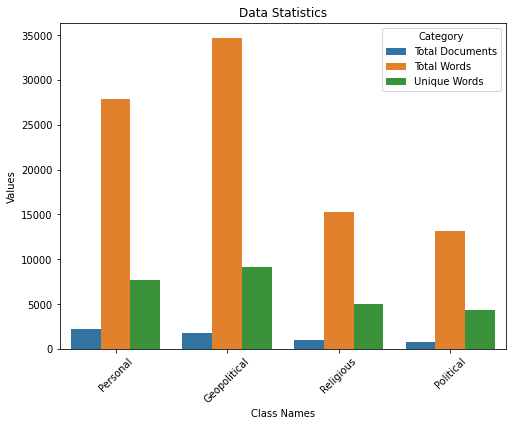

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

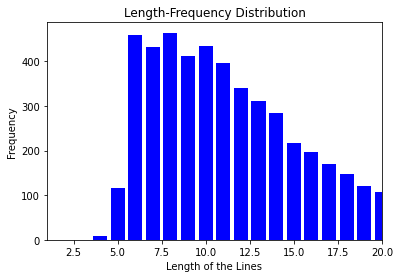

Maximum Length of a line: 101
Minimum Length of a line: 4
Average Length of a line: 16.0


In [ ]:
dataset['LineLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.LineLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 20)

plt.xlabel('Length of the Lines')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a line: {max(dataset.LineLength)}")
print(f"Minimum Length of a line: {min(dataset.LineLength)}")
print(f"Average Length of a line: {round(np.mean(dataset.LineLength),0)}")

In [ ]:
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
                                      #==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def label_encoding(category,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        category: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(category)
    encoded_labels = le.transform(category)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(category[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(lines,category):
    """
    This function will return the splitted (90%-10%-10%) feature vector . 
    
    Args:
        headlines: sequenced headlines 
        category: encoded lables (array) 
        
    Returns:
        X_train: training data 
        X_valid: validation data
        X_test : testing feature vector 
        y_train: training encoded labels (array) 
        y_valid: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X,X_test,y,y_test = train_test_split(lines,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print(color.BOLD+"\nDataset Distribution:\n"+color.END)
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(lines),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))
  
    return X_train,X_valid,X_test,y_train,y_valid,y_test


In [ ]:
labels = label_encoding(dataset.category,True)


			===== Label Encoding ===== 
Class Names:--> ['Geopolitical' 'Personal' 'Political' 'Religious']
Geopolitical   0 

Religious   3 

Geopolitical   0 

Geopolitical   0 

Personal   1 

Religious   3 

Personal   1 

Religious   3 

Personal   1 

Religious   3 

Political   2 

Political   2 

Geopolitical   0 

Political   2 

Personal   1 



In [ ]:
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(dataset.text,labels)


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 5698 
	Training		 4102 
	Test			 570 
	Validation		 1026


Tokenization:

In [ ]:
vocab_size = 57000
embedding_dim = 64
max_length = 21
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

def padded_headlines(original,encoded,padded):
  '''
  print the samples padded headlines
  '''
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")  
  print(original,"\n",encoded) 
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,original,"\n",padded)  

In [ ]:
# Train Data Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
#============================== Tokenizer Info =================================
(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
  for w,c in ordered[:10]:
    print(w,"\t",c)
  #=============================== Print all the information =========================
print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)   
print("Words --> Counts:")
tokenizer_info(word_counts,bool =True )
print("\nWords --> Documents:")
tokenizer_info(word_docs,bool =True )
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )    
print("\nTotal Documents -->",document_count)
print(f"Found {len(word_index)} unique tokens")

			====== Tokenizer Info ======
Words --> Counts:
না 	 871
করে 	 644
আর 	 631
এই 	 513
কি 	 495
ভারত 	 386
। 	 365
ভারতের 	 354
কে 	 338
ও 	 330

Words --> Documents:
না 	 745
আর 	 552
করে 	 547
এই 	 462
কি 	 438
ভারত 	 346
ভারতের 	 307
কে 	 292
ও 	 277
হয় 	 270

Words --> Index:
তরুণ 	 15403
ইউটিউবে 	 15402
জ্বালায় 	 15401
গোয়ামারা 	 15400
থকলেই 	 15399
১০০টি 	 15398
দাতাল 	 15397
গনি 	 15396
নহর 	 15395
জান্নাতে 	 15394

Total Documents --> 4102
Found 15403 unique tokens


In [ ]:
padded_headlines(X_train[1],train_sequences[1],train_padded[1]) 


			====== Encoded Sequences ====== 

এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে বছরের পর বছর, তাদের আরো এমন রাস্তায় রাস্তায় কাঁদতে হবে  
 [5577, 443, 154, 12, 2, 173, 1713, 6, 65, 29, 5578, 37, 5579, 187, 710, 121, 11, 710, 777, 1103, 11, 102, 1714, 111, 5580, 173, 155, 6, 3398, 711, 273, 1103, 5581]

			====== Paded Sequences ======
 এই সরকার কে যারা নির্লজ্জের মত সাপোর্ট দিয়েছে বছরের পর বছর, তাদের আরো এমন রাস্তায় রাস্তায় কাঁদতে হবে  
 [5579  187  710  121   11  710  777 1103   11  102 1714  111 5580  173
  155    6 3398  711  273 1103 5581]


In [ ]:
# Validation Data Tokenization
validation_sequences = tokenizer.texts_to_sequences(X_valid)
validation_padded = pad_sequences(validation_sequences, padding=padding_type , maxlen=max_length)
padded_headlines(X_valid[10],validation_sequences[1],validation_padded[1]) 


			====== Encoded Sequences ====== 

তারউপর এটা কেমন টাইটেল দিছস তোর ভিডিওর? 
 [2922, 2057, 12329, 2146, 3319, 1615, 38, 85, 1, 25, 2299, 133, 1122, 11908, 925, 1, 11635, 53, 1, 144, 456]

			====== Paded Sequences ======
 তারউপর এটা কেমন টাইটেল দিছস তোর ভিডিওর? 
 [ 2922  2057 12329  2146  3319  1615    38    85     1    25  2299   133
  1122 11908   925     1 11635    53     1   144   456]


In [ ]:
X_test

4282               হাম্বা লীগ গুলা খারাপ কথা ছাড়া কি পারে
1066    ভারতের সৈন্যকে মেরে উপযুক্ত জবাব দাও।একটার বদল...
864     আপনার খুরা যুক্তিটা রাজাকারদের যুক্তির মতো মনে...
3540                 ভাই শিব লিঙ্গ চুমু তোমরা দাও মক্কায়।
3672    কত বড় মূর্খ হলে পরে নাস্তিক হতে পারে ভেবে দেখ...
                              ...                        
1595    আসলে পাকিস্তানিরা কবে বুঝবে তাদের ভিক্ষার বূত্...
4058    এক নাস্তিকের সাথে আলাপ হচ্ছিল তিনিও এই মাথামোট...
4771    গ্রামের মেম্বার পদে নির্বাচন করলেও এরা ফেইল কর...
3653             ভাবতে অবাক লাগে অপরাধীরা এখনো বেঁচে আছে 
3174    বিগত দিনে ছাত্র লীগ-যুবলীগ যে সব অকর্ম করছে, স...
Name: text, Length: 570, dtype: object

In [ ]:
# Test Data Tokenization
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type , maxlen=max_length)
padded_headlines(X_test[864],test_sequences[100],test_padded[100]) 


			====== Encoded Sequences ====== 

আপনার খুরা যুক্তিটা রাজাকারদের যুক্তির মতো মনে হয়। একাত্তরে ভারত যদি এমন যুক্তি দিত তাহলে কেমন হতো? ভেবেচেন কি? 
 [4563, 15, 6, 4601, 1235, 124, 2, 1390, 1390, 3486, 1]

			====== Paded Sequences ======
 আপনার খুরা যুক্তিটা রাজাকারদের যুক্তির মতো মনে হয়। একাত্তরে ভারত যদি এমন যুক্তি দিত তাহলে কেমন হতো? ভেবেচেন কি? 
 [4563   15    6 4601 1235  124    2 1390 1390 3486    1    0    0    0
    0    0    0    0    0    0    0]


In [ ]:
train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test

Models:

MultinomialNB

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the documents
vectorizer = CountVectorizer()

#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import HashingVectorizer

# Vectorize the documents
#vectorizer = HashingVectorizer()


# Vectorize the documents
#vectorizer = CountVectorizer()

# Vectorize the documents
#vectorizer = TfidfVectorizer()
#X_train = vectorizer.fit_transform(df_train['text'])
X_train_ = vectorizer.fit_transform(X_train)
#X_test = vectorizer.transform(df_test['text'])
X_test_ = vectorizer.transform(X_test)

# Train the model
model = MultinomialNB()
#model.fit(X_train, df_train['label'])
#model.fit(train_padded, train_label_seq)
model.fit(X_train_, y_train)

# Predict the labels on the test set
#y_pred = model.predict(X_test)
#y_pred = model.predict(test_padded)
y_pred = model.predict(X_test_)

# Evaluate the model
#accuracy = accuracy_score(df_test['label'], y_pred)
#accuracy = accuracy_score(testing_label_seq, y_pred)

print("MultinomialNB:")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

MultinomialNB:
Accuracy: 0.6596491228070176
Precision: 0.6693870380826903
Recall: 0.5877377410745142
F1 Score: 0.6053342899788021


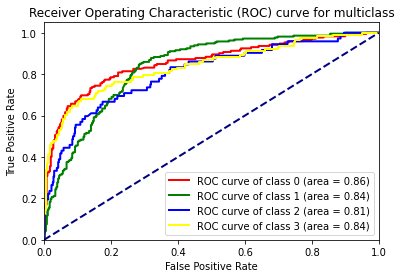

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#model.fit(X_train_, y_train)

# Predict probabilities for each class
y_prob_rf = model.predict_proba(X_test_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['red', 'green', 'blue','yellow']
for i, color in zip(range(len(model.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for multiclass')
plt.legend(loc="lower right")
plt.show()

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer


# Vectorize the documents
#vectorizer = CountVectorizer()

# Vectorize the documents
vectorizer = TfidfVectorizer()
#X_train = vectorizer.fit_transform(df_train['text'])
X_train_ = vectorizer.fit_transform(X_train)
#X_test = vectorizer.transform(df_test['text'])
X_test_ = vectorizer.transform(X_test)


model = RandomForestClassifier()
model.fit(X_train_, y_train)

train_accuracy = model.score(X_train_, y_train)
test_accuracy = model.score(X_test_, y_test)

# print("Train Accuracy:", train_accuracy)
# print("Test Accuracy:", test_accuracy)

y_pred = model.predict(X_test_)

print("RandomForest:")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

RandomForest:
Accuracy: 0.6807017543859649
Precision: 0.6909253274162417
Recall: 0.600637699478985
F1 Score: 0.6207259930981743


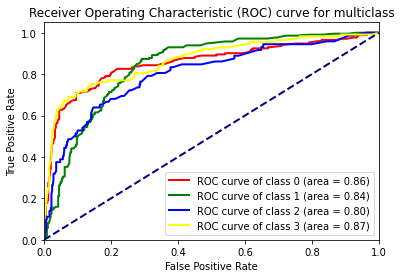

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#model.fit(X_train_, y_train)

# Predict probabilities for each class
y_prob_rf = model.predict_proba(X_test_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['red', 'green', 'blue','yellow']
for i, color in zip(range(len(model.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for multiclass')
plt.legend(loc="lower right")
plt.show()

SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Vectorize the documents
vectorizer = TfidfVectorizer()

X_train_ = vectorizer.fit_transform(X_train)

X_test_ = vectorizer.transform(X_test)


model = SVC(kernel='linear',probability=True)
model.fit(X_train_, y_train)

# score = model.score(X_test_, y_test)
# print("Accuracy:", score)

y_pred = model.predict(X_test_)

print("SVC:")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

SVC:
Accuracy: 0.6719298245614035
Precision: 0.6969826061837014
Recall: 0.5974295355954988
F1 Score: 0.6202413523548955


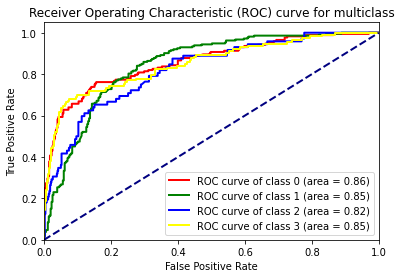

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model.fit(X_train_, y_train)

# Predict probabilities for each class
y_prob_rf = model.predict_proba(X_test_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['red', 'green', 'blue','yellow']
for i, color in zip(range(len(model.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for multiclass')
plt.legend(loc="lower right")
plt.show()

[link text](https://)Logistic classsifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

#model = GradientBoostingClassifier()
#vectorizer = TfidfVectorizer()

X_train_ = vectorizer.fit_transform(X_train)

X_test_ = vectorizer.transform(X_test)


model = LogisticRegression()
model.fit(X_train_, y_train)


y_pred = model.predict(X_test_)

print("SVC:")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

SVC:
Accuracy: 0.6754385964912281
Precision: 0.7010571563274194
Recall: 0.5986779952887387
F1 Score: 0.6215752290476413


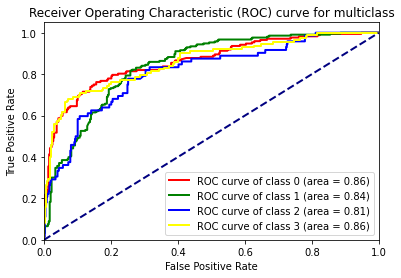

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model.fit(X_train_, y_train)

# Predict probabilities for each class
y_prob_rf = model.predict_proba(X_test_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['red', 'green', 'blue','yellow']
for i, color in zip(range(len(model.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve for multiclass')
plt.legend(loc="lower right")
plt.show()